# Airline Satisfaction
By: Change Liu, Kunlin Lyu, and Ziyuan Mao

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Objective" data-toc-modified-id="1.-Objective-1">1. Objective</a></span></li><li><span><a href="#2.-Data-Exploration" data-toc-modified-id="2.-Data-Exploration-2">2. Data Exploration</a></span></li><li><span><a href="#3.-Data-Cleaning" data-toc-modified-id="3.-Data-Cleaning-3">3. Data Cleaning</a></span></li><li><span><a href="#4.-Adaptations" data-toc-modified-id="4.-Adaptations-4">4. Adaptations</a></span></li><li><span><a href="#5.-Descriptive-Static-Visualization" data-toc-modified-id="5.-Descriptive-Static-Visualization-5">5. Descriptive Static Visualization</a></span></li><li><span><a href="#6.-New-Subset" data-toc-modified-id="6.-New-Subset-6">6. New Subset</a></span></li><li><span><a href="#7.Step-by-step-hierarchical-clustering" data-toc-modified-id="7.Step-by-step-hierarchical-clustering-7">7.Step-by-step hierarchical clustering</a></span><ul class="toc-item"><li><span><a href="#(1)-Use-elbow-point-method-to-find-out-the-best-number-of-clusters" data-toc-modified-id="(1)-Use-elbow-point-method-to-find-out-the-best-number-of-clusters-7.1">(1) Use elbow point method to find out the best number of clusters</a></span></li><li><span><a href="#（2）Explain-How-Does-AgglomerativeClustering-Work" data-toc-modified-id="（2）Explain-How-Does-AgglomerativeClustering-Work-7.2">（2）Explain How Does AgglomerativeClustering Work</a></span></li></ul></li><li><span><a href="#8.-Dendrogram" data-toc-modified-id="8.-Dendrogram-8">8. Dendrogram</a></span></li><li><span><a href="#9.-Step-by-step-K-means" data-toc-modified-id="9.-Step-by-step-K-means-9">9. Step-by-step K-means</a></span></li><li><span><a href="#10.-Sklearn.cluster(K-mean)" data-toc-modified-id="10.-Sklearn.cluster(K-mean)-10">10. Sklearn.cluster(K-mean)</a></span></li><li><span><a href="#11.-kNN-Function" data-toc-modified-id="11.-kNN-Function-11">11. kNN Function</a></span></li><li><span><a href="#12.-Project-Report" data-toc-modified-id="12.-Project-Report-12">12. Project Report</a></span></li><li><span><a href="#Originality" data-toc-modified-id="Originality-13">Originality</a></span></li></ul></div>

## 1. Objective
The fastest and most comfortable way to travel to a new destination is by taking an airplane. It is understandable for us to have high standards for airplanes to maximize our travel experiences. An airline company is trying to improve their customers' satisfaction. So this company hires our team to conduct a study based on the customers' ratings on different factors of their airline, and our objective is to find the most influential factors that will affect the ratings of an airline.

This study will use clustering methods such as hierarchical clustering, K-means clustering, and KNN clustering to analyze the data. We can then use the generated model to be used as a prediction system of the customer base's satisfaction based on the given features' ratings. 

With the outcomes of our study, the airline company will be able to use our models to predict their customers' satisfaction, and based on the predictions; they can make targeted improvements for their flight routes, airplane upgrades, passenger services, etc..

## 2. Data Exploration

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
import random
df = pd.read_csv('Invistico_Airline.csv')
#display first 4 rows
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [2]:
# Show name of columnes, type of data columns, number of columns and rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [3]:
# show statistics data
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## 3. Data Cleaning

In [4]:
# Data Cleaning
df.columns = df.columns.str.replace(' ', '_')
df['Arrival_Delay_in_Minutes'] = df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].mean()).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   satisfaction                       129880 non-null  object
 1   Gender                             129880 non-null  object
 2   Customer_Type                      129880 non-null  object
 3   Age                                129880 non-null  int64 
 4   Type_of_Travel                     129880 non-null  object
 5   Class                              129880 non-null  object
 6   Flight_Distance                    129880 non-null  int64 
 7   Seat_comfort                       129880 non-null  int64 
 8   Departure/Arrival_time_convenient  129880 non-null  int64 
 9   Food_and_drink                     129880 non-null  int64 
 10  Gate_location                      129880 non-null  int64 
 11  Inflight_wifi_service              129880 non-null  

We replaced all the spaces with an underscore, changed the data type of 'Arrival Delay in Minutes' from float to integer, and filled the nan's in arrival delay in minutes to the mean.

## 4. Adaptations

In [5]:
# Subset of categorical columns
category = ["satisfaction", "Gender", "Customer_Type", "Class"]
for c in category:
    print ("{} \n".format(df[c].value_counts()))

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64 

Female    65899
Male      63981
Name: Gender, dtype: int64 

Loyal Customer       106100
disloyal Customer     23780
Name: Customer_Type, dtype: int64 

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64 



This is the subset of all the categorical columns, if we want to use the categorical columns in our clustering we have to change the data types to integers. The above is just to see how many datas are in all the columns.

In [6]:
# Assigning numbers, creating new columns
satisfy= {"satisfied": 0,"dissatisfied": 1 }
df['satisfaction']  = df['satisfaction'].map(satisfy)

Gender = {"Male": 0,"Female": 1 }
df['Gender']  = df['Gender'].map(Gender)

Customer = {"Loyal Customer": 0,"disloyal Customer": 1 }
df['Customer_Type']  = df['Customer_Type'].map(Customer)

Class = {"Business": 0, "Eco Plus": 1, "Eco": 2}
df['Class'] = df['Class'].map(Class)

Type =  {"Personal Travel": 0, "Business travel": 1}
df['Type_of_Travel'] = df['Type_of_Travel'].map(Type)

df.head()

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,0,1,0,65,0,2,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0
1,0,0,0,47,0,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305
2,0,1,0,15,0,2,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0
3,0,1,0,60,0,2,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0
4,0,1,0,70,0,2,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0


We changed the satisfaction, gender, customer, and travel type to 0s and 1s. The seated class has business, eco, and eco plus, so we converted into 0, 1, and 2. This is easier for people who are not familiar with coding to spot the categories in each columns.

## 5. Descriptive Static Visualization

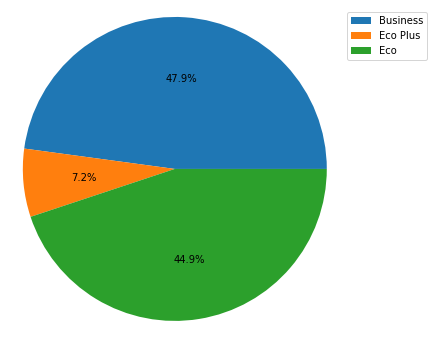

In [7]:
# pie chart of airplane seat class
c_lass = df['Class']
labels = ['Business','Eco Plus','Eco']
sizes = ['62160','9411','58309']

explode = (0,0,0)

fig, ax = plt.subplots(figsize = (6,6))

p4 = ax.pie(sizes, 
            explode = explode, 
             autopct = '%1.1f%%',
           textprops = {'fontsize':10})

plt.legend(
    loc = 'best', 
    fontsize = 10, 
    bbox_to_anchor = (1,1),
    labels = labels)
ax.axis('equal')
plt.show()

From this pie chart, we can see that most people ride in either business or economy class, and only a small portion of people buy tickets for Eco plus class. The main reason the distribution is spread evenly among business and eco is that some planes are too small to have an eco plus seat section.

Text(0, 0.5, 'Dissatisfactoin Rate')

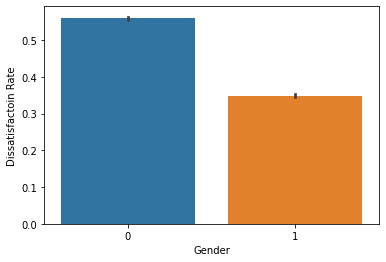

In [8]:
# bar graph the satisfaction rate
sns.barplot(x='Gender',y='satisfaction',data=df).set_ylabel('Dissatisfactoin Rate')

This bar graph shows males' and females' satisfaction rate for this flight. It shows here that males are satisfied more with the flight than females are. Some females tend to have higher standards than others; maybe the person did not like the air hostess's attitude, etc., small factors will affect people's satisfaction scores.

<AxesSubplot:xlabel='Age'>

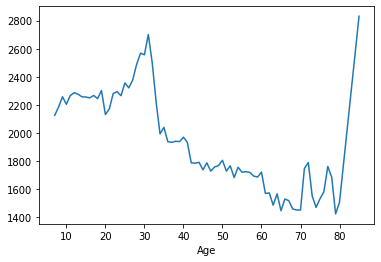

In [9]:
# plot for age and distance of this flight
df.groupby(by = 'Age')['Flight_Distance'].mean().plot()

This plot shows the average flight distance for each age category. We can see people who are most likely to be traveling by planes are the 20+ years old young adults, 30+ to 40+ years old adults who are likely to be on business trips or family vacations. Then there are the 60+ to 70+ years old elders that are retired, who are currently traveling with their partners for sightseeing.

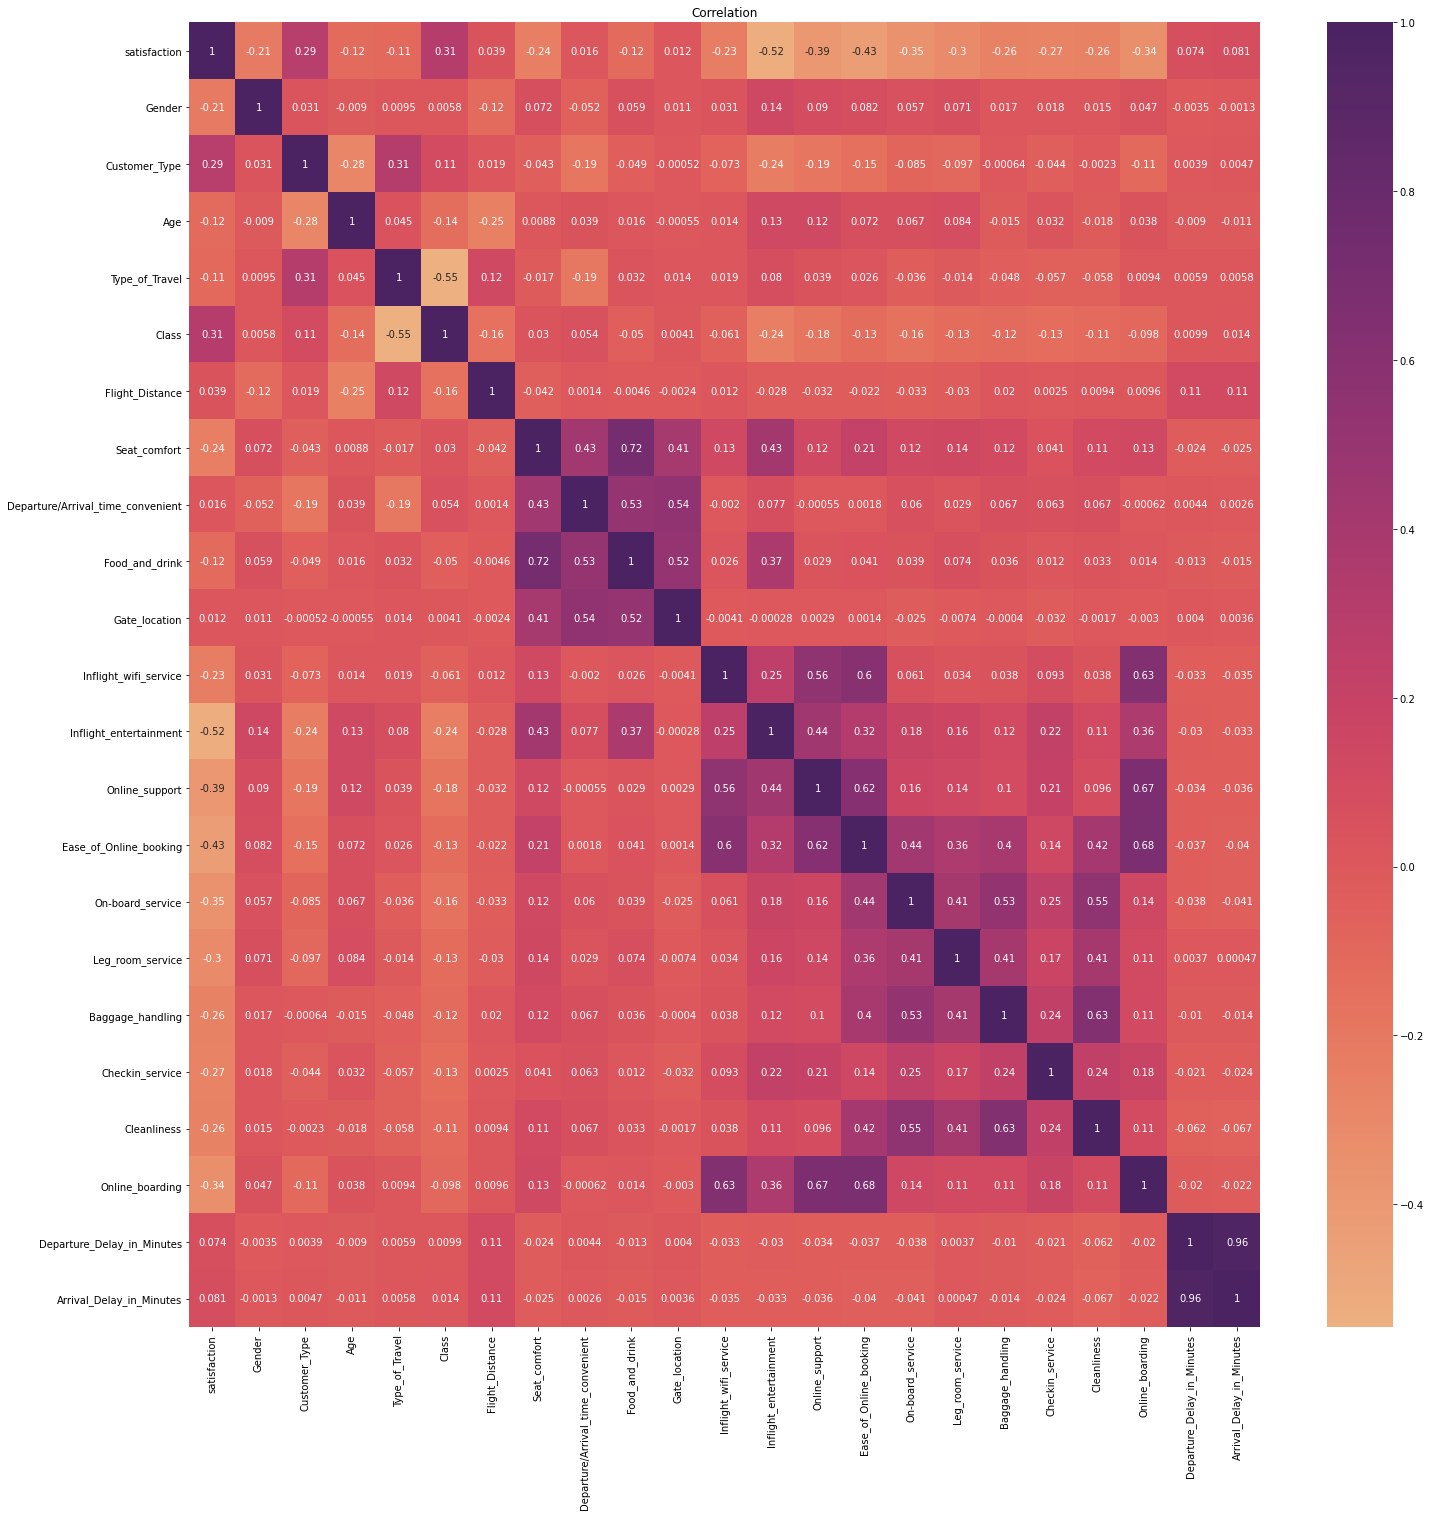

In [10]:
# heatmap of dataset
import seaborn as sns
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(), annot = True, cmap = 'flare')
plt.title('Correlation')
plt.show()

## 6. New Subset

In [11]:
airline = df[['satisfaction','Gender','Type_of_Travel','Food_and_drink','Inflight_entertainment','Cleanliness']]
airline = airline.sample(frac=0.01,random_state=10)
airline

,satisfaction,Gender,Type_of_Travel,Food_and_drink,Inflight_entertainment,Cleanliness
79871,0,1,1,3,3,3
18809,1,0,0,2,2,5
50206,1,1,1,2,2,3
93443,0,1,1,2,5,4
16050,0,1,0,4,1,4
...,...,...,...,...,...,...
107801,0,1,1,4,4,4
113186,0,0,1,4,3,5
88090,1,1,1,2,3,3
61427,0,1,1,5,1,5


Base on the data visualizaions above, our team decide to study certain features, thus, we subset the dataframe again, now our new dataset is named airline and contains 6 columns. 

## 7.Step-by-step hierarchical clustering

### (1) Use elbow point method to find out the best number of clusters

In [12]:
inertia_list = []
for k in range(1,7):
    model = KMeans(n_clusters=k)
    model.fit(airline)
    inertia_list.append(model.inertia_)

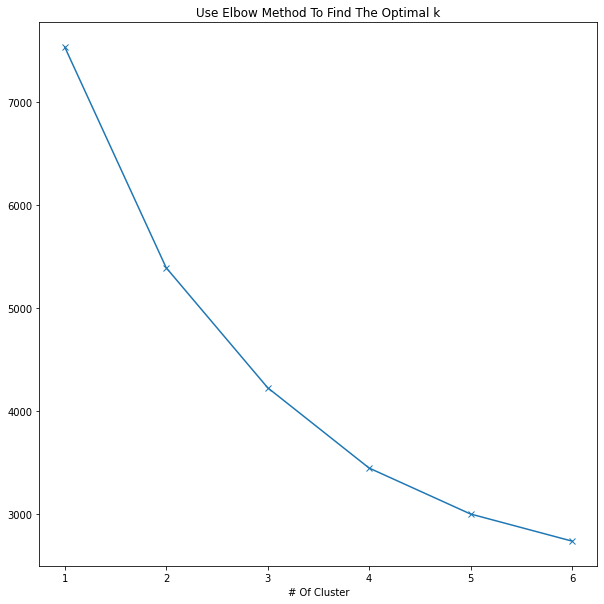

In [13]:
k=range(1,7)
plt.figure(figsize=(10,10))
plt.plot(k,inertia_list,'-x')
plt.xlabel('# Of Cluster')
plt.title('Use Elbow Method To Find The Optimal k')
plt.show()

From the graph above, we decide the best number of clusters is 4 because the line got flatten at 4.

In [14]:
from sklearn.cluster import AgglomerativeClustering       # Import AgglomerativeClustering method
model = AgglomerativeClustering( n_clusters=4)            # Set number of clusters to be 4.
model = model.fit(airline)                                # Use the model fit the data

In [15]:
df1 = airline.copy()                # Make a copy of the original data
df1['Cluster'] = model.labels_      # Create a new column in the new dataframe to indicate which 
df1                                 # cluster does the customer belongs to and display the result

,satisfaction,Gender,Type_of_Travel,Food_and_drink,Inflight_entertainment,Cleanliness,Cluster
79871,0,1,1,3,3,3,2
18809,1,0,0,2,2,5,1
50206,1,1,1,2,2,3,3
93443,0,1,1,2,5,4,2
16050,0,1,0,4,1,4,0
...,...,...,...,...,...,...,...
107801,0,1,1,4,4,4,0
113186,0,0,1,4,3,5,0
88090,1,1,1,2,3,3,3
61427,0,1,1,5,1,5,0


### （2）Explain How Does AgglomerativeClustering Work

In [16]:
from sklearn.metrics.pairwise import euclidean_distances  # Import function to compute distance between each cluster

In [17]:
sp = airline.head(10)                       # Take the first 10 rows from the dataset as sample

In [18]:
distance_df = pd.DataFrame(euclidean_distances(sp))  # Compute distances 
distance_df

,0,1,2,3,4,5,6,7,8,9
0,0.000000,3.000000,1.732051,2.449490,2.645751,1.414214,2.645751,3.316625,3.316625,2.000000
1,3.000000,0.000000,2.449490,3.605551,2.828427,2.645751,2.000000,4.242641,5.099020,3.872983
2,1.732051,2.449490,0.000000,3.316625,2.828427,1.000000,1.414214,2.828427,4.000000,2.645751
3,2.449490,3.605551,3.316625,0.000000,4.582576,2.449490,4.123106,4.123106,3.605551,2.828427
4,2.645751,2.828427,2.828427,4.582576,0.000000,3.316625,2.449490,4.898979,5.291503,3.872983
5,1.414214,2.645751,1.000000,2.449490,3.316625,0.000000,2.236068,2.645751,3.316625,2.000000
6,2.645751,2.000000,1.414214,4.123106,2.449490,2.236068,0.000000,4.000000,5.291503,3.872983
7,3.316625,4.242641,2.828427,4.123106,4.898979,2.645751,4.000000,0.000000,2.828427,2.645751
8,3.316625,5.099020,4.000000,3.605551,5.291503,3.316625,5.291503,2.828427,0.000000,1.732051
9,2.000000,3.872983,2.645751,2.828427,3.872983,2.000000,3.872983,2.645751,1.732051,0.000000


Step 1: The agglomerative clustering method firstly treat each data point as a single cluster.

Step 2: Compute the distances from each cluster to others, then choose the minimum distance, locate the corresponding clusters pair. In the example above, the closest clusters are cluster-0 and cluster-8.

Step 3: Put the closest clusters into one cluster, In the example above, 0 and 8 now become one cluster:(0,8).

Step 4: Now loop to find out the next cluster pair that has the minimum distance, then do the samething until the number of clusters is equal to the nember we set.

## 8. Dendrogram

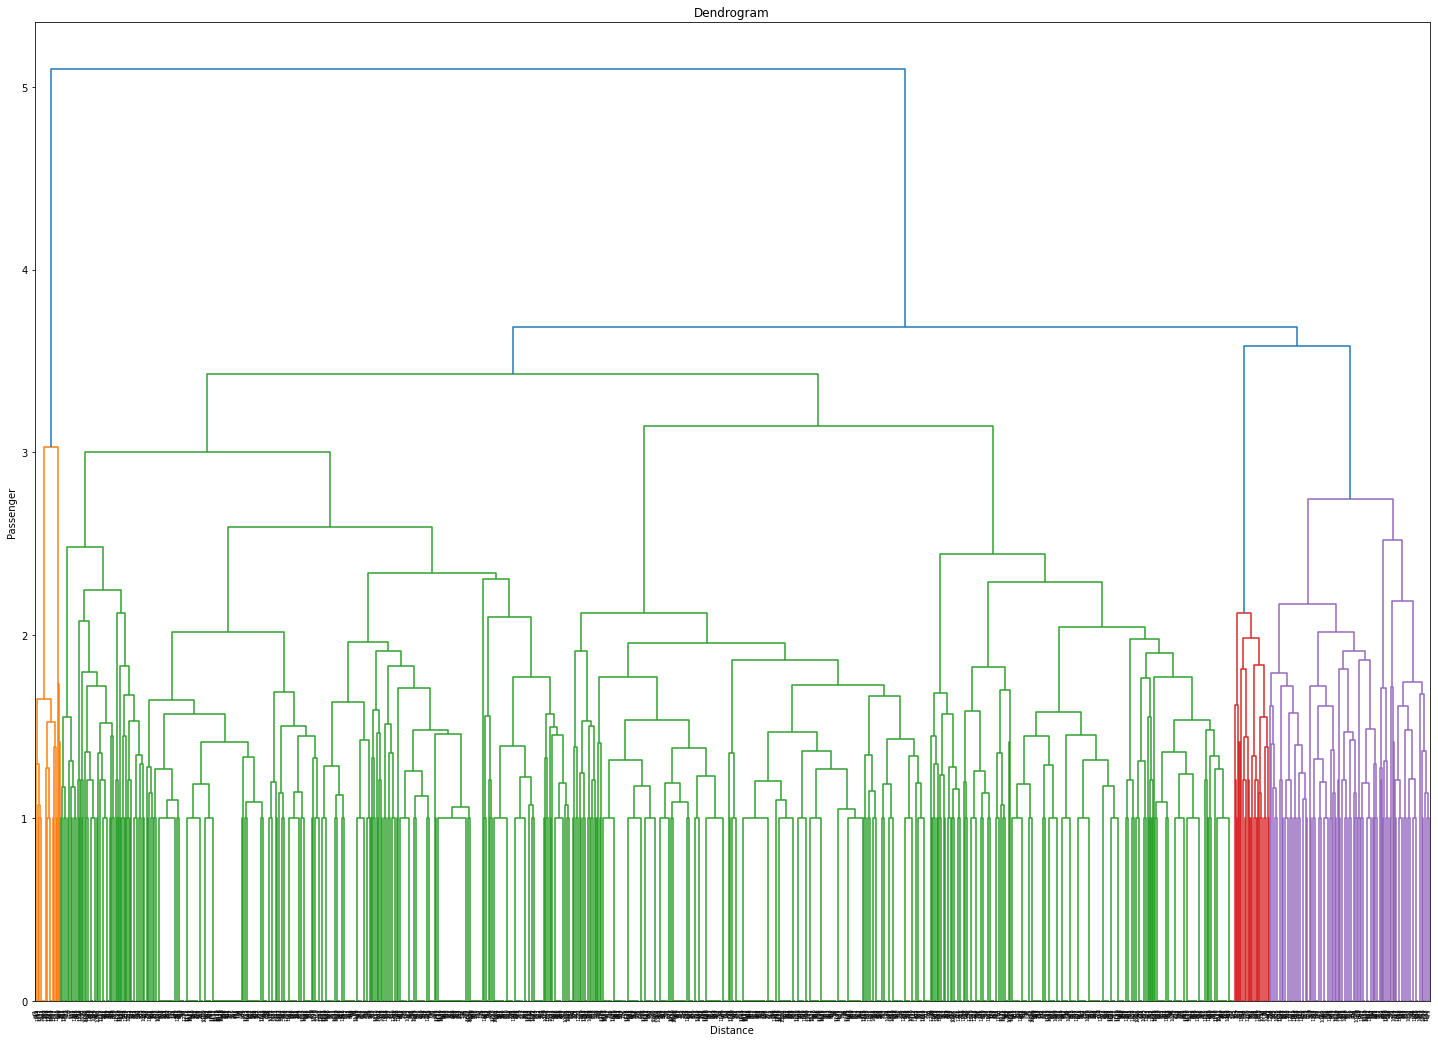

In [19]:
Z = linkage(airline,'average') 
plt.figure(figsize=(25,18)) 
plt.title('Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Passenger')
dendrogram(Z)
plt.show()

Above is the plot for the dendrogram of the hierarchical clustering we performed in step 7. We have decided this dataset should be separated into four clusters in order to predict the satisfaction scores. From the dendrogram, we can see a precise cluster segmentation at 4 clusters, and it does not seem to have 3 clusters; therefore, 4 clusters should be the best choice.

  ## 9. Step-by-step K-means

In [52]:
# k-means algorithms
def kmeans(df,k):
    df = df.to_numpy()
    m,n = df.shape
    cluster = np.empty(m,dtype=np.int)
    centroids = np.empty((k,n))
    random.seed(99)
    rdlist = random.sample(range(m),k)
    centroids = df[rdlist]
    
    while True:
        d = np.square(np.repeat(df, k, axis=0).reshape(m, k, n) - centroids)
        distance = np.sqrt(np.sum(d, axis=2))
        minimum = np.argmin(distance, axis=1)
        if (minimum == cluster).all():
            return cluster
        
        cluster[:] = minimum
        for i in range(k):
            items = df[cluster==i]
            centroids[i] = np.mean(items, axis=0)

In [53]:
# putting results into different clusters
df2 = airline.copy()
result = kmeans(df2,4)
df2['Cluster']=result

In [54]:
cluster1= df2[df2['Cluster']==0]
cluster2= df2[df2['Cluster']==1]
cluster3= df2[df2['Cluster']==2]
cluster4= df2[df2['Cluster']==3]

In [55]:
cluster1

,satisfaction,Gender,Type_of_Travel,Food_and_drink,Inflight_entertainment,Cleanliness,Cluster
50206,1,1,1,2,2,3,0
88130,1,1,1,2,3,3,0
93821,0,0,1,1,4,3,0
95569,0,1,1,1,4,4,0
105464,1,0,1,1,4,4,0
...,...,...,...,...,...,...,...
11482,0,1,0,1,4,4,0
80784,1,1,1,1,3,3,0
99789,0,1,1,1,4,3,0
88090,1,1,1,2,3,3,0


In [56]:
cluster2

,satisfaction,Gender,Type_of_Travel,Food_and_drink,Inflight_entertainment,Cleanliness,Cluster
79871,0,1,1,3,3,3,1
93443,0,1,1,2,5,4,1
22962,1,0,0,3,5,1,1
31477,1,1,0,3,4,2,1
126932,0,1,1,4,4,5,1
...,...,...,...,...,...,...,...
67086,1,1,1,3,3,1,1
110076,0,1,1,2,5,5,1
76249,1,1,1,4,3,2,1
107801,0,1,1,4,4,4,1


In [57]:
cluster3

,satisfaction,Gender,Type_of_Travel,Food_and_drink,Inflight_entertainment,Cleanliness,Cluster
2700,1,0,0,1,3,1,2
41194,1,1,1,1,1,1,2
68481,1,0,1,1,4,1,2
22584,1,0,0,1,1,1,2
66994,1,0,1,2,3,1,2
64557,0,0,1,0,4,1,2
32864,1,0,0,4,1,1,2
40019,0,1,1,0,0,1,2
1637,1,0,0,0,4,1,2
64619,0,0,1,0,3,1,2


In [58]:
cluster4

,satisfaction,Gender,Type_of_Travel,Food_and_drink,Inflight_entertainment,Cleanliness,Cluster
18809,1,0,0,2,2,5,3
16050,0,1,0,4,1,4,3
67991,1,1,1,2,1,4,3
74663,1,0,1,4,2,4,3
112467,0,0,1,2,2,4,3
...,...,...,...,...,...,...,...
41589,1,0,1,1,1,5,3
46160,1,0,1,2,2,4,3
29059,1,0,0,3,3,5,3
14876,1,0,0,2,2,4,3


In [59]:
cluster1['satisfaction'].value_counts() 

1    141
0     77
Name: satisfaction, dtype: int64

In [60]:
cluster1.describe()

,satisfaction,Gender,Type_of_Travel,Food_and_drink,Inflight_entertainment,Cleanliness,Cluster
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.0
mean,0.646789,0.444954,0.692661,1.133028,2.224771,3.279817,0.0
std,0.479068,0.498104,0.462453,0.740974,1.374532,0.831220,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0
25%,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.0
50%,1.000000,0.000000,1.000000,1.000000,2.000000,3.000000,0.0
75%,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,0.0
max,1.000000,1.000000,1.000000,3.000000,5.000000,5.000000,0.0


For the clusters, 0 is satisfied, 1 is dissatisfied. In cluster 1, there are 218 passengers, 77 passengers are satisfied with this flight with a mean at 0.64, this means 35% are satisfied with the flight, and 65% of the passenger are dissatisfied. The gender consists of mostly males; the type of travel has a mean of 0.69, which indicates that the passengers in this cluster are on business trips. Their satisfaction ratings on the food, drink are low, but the cleanliness was slightly above average which means the airline still has much room for improvement. Cluster 1 can be clustering dissatisfied male passengers traveling for business and has high standards for the food, drink and inflight entertainment, cleanliness was mediocre and think the airline can improve their passengers' inflight experience.

In [32]:
cluster2['satisfaction'].value_counts()

0    548
1    270
Name: satisfaction, dtype: int64

In [33]:
cluster2.describe()

,satisfaction,Gender,Type_of_Travel,Food_and_drink,Inflight_entertainment,Cleanliness,Cluster
count,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.0
mean,0.330073,0.536675,0.727384,3.498778,4.078240,3.737164,1.0
std,0.470527,0.498958,0.445577,1.161657,0.833063,1.148939,0.0
min,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.0
25%,0.000000,0.000000,0.000000,3.000000,4.000000,3.000000,1.0
50%,0.000000,1.000000,1.000000,4.000000,4.000000,4.000000,1.0
75%,1.000000,1.000000,1.000000,4.000000,5.000000,5.000000,1.0
max,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,1.0


In cluster 2, there are 818 passengers; 77% of the passengers are satisfied with the flight. The passengers are half males and half females, most of them are on business trips. They gave an average rating of 3 to 4 for the food, drink, inflight entertainment, and cleanliness, all above average. Cluster 2 contains passengers who enjoy the flight, who thought the airline did a great job providing a pleasant flight experience, but there is still room for improvement.

In [34]:
cluster3['satisfaction'].value_counts()

1    21
0     7
Name: satisfaction, dtype: int64

In [35]:
cluster3.describe()

,satisfaction,Gender,Type_of_Travel,Food_and_drink,Inflight_entertainment,Cleanliness,Cluster
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.0,28.0
mean,0.750000,0.428571,0.714286,1.250000,2.464286,1.0,2.0
std,0.440959,0.503953,0.460044,1.142609,1.318870,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.0
25%,0.750000,0.000000,0.000000,0.000000,1.750000,1.0,2.0
50%,1.000000,0.000000,1.000000,1.000000,2.500000,1.0,2.0
75%,1.000000,1.000000,1.000000,2.000000,3.250000,1.0,2.0
max,1.000000,1.000000,1.000000,4.000000,5.000000,1.0,2.0


In cluster 3, there are 28 passengers, 21 passengers are dissatisfied with this flight with a mean at 0.75, this means 25% passengers are satisfied with the flight, and 75% of the passenger are dissatisfied. The gender consists of mostly males; the type of travel has a mean of 0.71, which indicates that the passengers in this cluster are on business trips. Their satisfaction ratings on the food, drink, and inflight entertainment are all low, which means the airline needs to improve "a lot". Cluster 3 can be clustering dissatisfied male passengers traveling for business, they have very high standards for food, drink, inflight entertainment and cleanliness, who thinks the airline should perform major remodel of their airplane services.

In [36]:
cluster4['satisfaction'].value_counts() 

1    158
0     77
Name: satisfaction, dtype: int64

In [37]:
cluster4.describe()

,satisfaction,Gender,Type_of_Travel,Food_and_drink,Inflight_entertainment,Cleanliness,Cluster
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.0
mean,0.672340,0.459574,0.591489,2.319149,2.200000,4.544681,3.0
std,0.470362,0.499427,0.492608,1.035820,0.918937,0.600145,0.0
min,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.0
25%,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,3.0
50%,1.000000,0.000000,1.000000,2.000000,2.000000,5.000000,3.0
75%,1.000000,1.000000,1.000000,3.000000,3.000000,5.000000,3.0
max,1.000000,1.000000,1.000000,5.000000,4.000000,5.000000,3.0


In cluster 4, there are 235 passengers; the satisfaction means 0.67, which means 33% of the passengers are satisfied with this flight, and 67% were dissatisfied. The gender mean is 0.46; this shows that most of the passengers in cluster 4 are males, with the mean of 0.59 in the type of travel suggests they are more likely to be on business trips and family trips mixed. This cluster's passengers gave below average scores for food and drink, inflight entertainment,and above average for cleanliness ratings. Cluster 4 can be a clustering of mostly dissatisfied male passengers on business trips and family trips with high expectations for food, drink, inflight entertainment provided, and cleanliness.

## 10. Sklearn.cluster(K-mean)

In [38]:
#using library to perform k-mean
from sklearn.cluster import KMeans

In [39]:
k_mean_model = KMeans(n_clusters = 4)
k_mean_result = k_mean_model.fit(airline)

In [40]:
df3 = airline.copy()
df3['Cluster']=k_mean_result.labels_
df3

,satisfaction,Gender,Type_of_Travel,Food_and_drink,Inflight_entertainment,Cleanliness,Cluster
79871,0,1,1,3,3,3,0
18809,1,0,0,2,2,5,3
50206,1,1,1,2,2,3,3
93443,0,1,1,2,5,4,2
16050,0,1,0,4,1,4,3
...,...,...,...,...,...,...,...
107801,0,1,1,4,4,4,1
113186,0,0,1,4,3,5,1
88090,1,1,1,2,3,3,3
61427,0,1,1,5,1,5,1


You can still acheive the same result for clustering method by either algorithm or using the machin learning libraries.

## 11. kNN Function

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
def predictKNN(K,vec,df):                       # K is number of neighbors, vec has r numbers and df has r columns
    knn = KNeighborsClassifier(n_neighbors = K,  # Conduct a KNN model and set number of neighbors
                           p = 2)                # with the passed value
    y = df.iloc[:,0]                             # Split the passed dataframe, y is the target data
    x = df.iloc[:,1:]                            # x is use to predict target
    knn.fit(x,y)                                 # Fit the model with x and y
    v = vec.iloc[1:].to_numpy()                  # Convert the vector to numpy array
    v = v.reshape(1, -1)                         # Reshape the array to be 2D
    cluster = knn.predict(v)                     # Use the model to predict the input vector
    return cluster                               # Return which cluster does the input vector belongs

In [43]:
sp = airline.sample(5)                           # Randomly select 5 rows from the dataset

In [44]:
k = 300                                          # Set number of neighbors to be 300
for i in range(5):                               # Loop to find out which clusters do the 5 sample 
    vec = sp.iloc[i,:]                           # customers belong to
    cluster = predictKNN(k,vec,airline)
    print("Customer",i+1,"belongs to cluster",cluster) # print out the result

Customer 1 belongs to cluster [0]
Customer 2 belongs to cluster [0]
Customer 3 belongs to cluster [0]
Customer 4 belongs to cluster [1]
Customer 5 belongs to cluster [0]


## 12. Project Report

Most people can relate to the pain and agony of sitting for hours in a tin can with two wings that sometimes can even be dangerous to travel in. However, most of the aircraft built today have integrated comfortable seating, inflight entertainment, wifi, and more. Airline companies are trying their best to accommodate every passenger to make their trip as smooth as possible. In this report, we have the dataset that collected passengers' survey responses on different aspects of the airline company that hired us to analyze which area satisfied and dissatisfied the passengers.

For our stakeholders, the airline company's board of directors to understand the significant areas that might affect passengers' inflight experience, we chose six crucial aspects of the data that can influence passengers the most. The new dataset includes satisfaction scores, passenger gender, type of travel, food onboard, inflight entertainment, and cleanliness. 

Using the elbow method, we found the best number of clusters is four because the line flattened at four. Which means it is best to separate our passengers into four groups to classify them. You can spot all passengers' clustering in the dendrogram, and they are broken down into four clusters to predict the satisfaction scores.

Next, we wrote an algorithm to calculate the k means. In this step, we assign the passengers base on their characteristics to each of the four centers through iterations. In the end, we have four distinct clusters that will each provide statistics of the airline data for us to analyze then provide suggestions.

There are 218 people in cluster 1, 35% of the passengers were satisfied. Cluster 1 includes dissatisfied male passengers who are most likely to travel by plane on business trips. They like to enjoy food, drink, and inflight entertainment provided by the airline and hope for a clean airplane when they board. 

Within cluster 2, out of 818 passengers, 77% of the passengers, 548 passengers liked the airline company's flying experience. Cluster 2 contains both male and female passengers on business trips who enjoy the flight, who thought the airline did a great job providing a pleasnt flight experience, but there are still room for improvements 

In cluster 3, there are 28 passengers; 75% of the passengers are dissatisfied. Cluster 3 is a clustering of dissatisfied male passengers traveling for business, they have very high standards for food, drink, inflight entertainment and cleanliness, who thinks the airline should perform major remodify of their airplane services.

There are 818 passengers in cluster 4, and 33% of the passengers felt satisfied with this trip. Cluster 2 is a clustering of mostly dissatisfied male passengers on business trips and family trips who enjoy the flight, who thought the airline did a good job providing a pleasant flight experience with their cleanliness of the aircraft, but there is still room for improvement for food, drink and inflight entertainment.

To better understand each of the customers, we created a recommendation system using KNN. The system will automatically classify each passenger into clusters. This way, we will be able to classify new passenger's information and preference quickly and easily.

From the clustering, it is safe to conclude that most passengers who travel onboard are traveling for work. Three of the clusters contained dissatisfied passengers who think the airline could have provided better food and drinks. Inflight entertainment and cleanliness could be enhanced, but the overall ratings were better than food and drink ratings. Our team's suggestion to the airline's board of directors is to improve all these areas to accommodate passengers and give them the best flying experience. A passenger who travels for work will most likely fly many times per year; providing them an excellent impression of the airline will encourage them to become loyal customers to generate more profits. 

## Originality

No other similar published works for clustering ground with same dataset specifid.